In [122]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf 
from statsmodels.tsa.seasonal import seasonal_decompose 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping


In [49]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [50]:
from google.colab import drive
drive.mount('/content/drive',force_remount=False)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [262]:
df= pd.read_csv("/content/drive/MyDrive/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv")

In [263]:
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,1325317920,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,1325317980,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1325318040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1325318100,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1325318160,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [264]:
df.shape

(4857377, 8)

In [265]:
df.isnull().sum()

Timestamp                  0
Open                 1243608
High                 1243608
Low                  1243608
Close                1243608
Volume_(BTC)         1243608
Volume_(Currency)    1243608
Weighted_Price       1243608
dtype: int64

In [266]:
df['Timestamp'] = pd.to_datetime(df.Timestamp, unit='s')
df.head()

,Timestamp,Open,High,Low,Close,Volume_(BTC),Volume_(Currency),Weighted_Price
0,2011-12-31 07:52:00,4.39,4.39,4.39,4.39,0.455581,2.0,4.39
1,2011-12-31 07:53:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2011-12-31 07:54:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2011-12-31 07:55:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2011-12-31 07:56:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [267]:
df = df.set_index('Timestamp')
df = df.resample("H").mean()
df.head()
len(df)

81066

In [268]:
df.isnull().sum()

Open                 3532
High                 3532
Low                  3532
Close                3532
Volume_(BTC)         3532
Volume_(Currency)    3532
Weighted_Price       3532
dtype: int64

In [269]:
df.ffill(inplace=True)

In [270]:
df.isnull().sum()

Open                 0
High                 0
Low                  0
Close                0
Volume_(BTC)         0
Volume_(Currency)    0
Weighted_Price       0
dtype: int64

In [366]:
data=df['Weighted_Price']
data_y=df['Weighted_Price']
data_m=df['Weighted_Price']
data_d=df['Weighted_Price']

In [367]:
data

Timestamp
2011-12-31 07:00:00        4.390000
2011-12-31 08:00:00        4.390000
2011-12-31 09:00:00        4.390000
2011-12-31 10:00:00        4.390000
2011-12-31 11:00:00        4.390000
                           ...     
2021-03-30 20:00:00    58682.385127
2021-03-30 21:00:00    58705.094588
2021-03-30 22:00:00    58788.454429
2021-03-30 23:00:00    58666.750127
2021-03-31 00:00:00    58764.349363
Freq: H, Name: Weighted_Price, Length: 81066, dtype: float64

In [368]:
data=pd.DataFrame(data)
data_y=pd.DataFrame(data_y)
data_y = data_y.resample("A").mean()

data_m = data_m.resample("M").mean()

data_m=pd.DataFrame(data_m)
data_d=pd.DataFrame(data_d)
data_d = data_d.resample("24H").mean()

In [405]:
data

,Weighted_Price
Timestamp,
2011-12-31 07:00:00,4.390000
2011-12-31 08:00:00,4.390000
2011-12-31 09:00:00,4.390000
2011-12-31 10:00:00,4.390000
2011-12-31 11:00:00,4.390000
...,...
2021-03-30 20:00:00,58682.385127
2021-03-30 21:00:00,58705.094588
2021-03-30 22:00:00,58788.454429


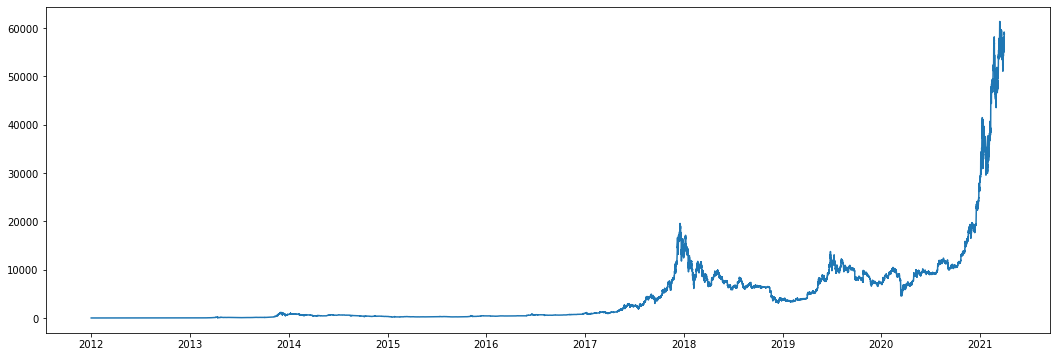

In [274]:
#hourly
import seaborn as sns
plt.figure(figsize=(18,6))
# sns.lineplot(x=df.index, y=df['Daily minimum temperatures'].fillna(np.inf),  linestyle="-")
plt.plot(data.index, data["Weighted_Price"], linestyle="-")
plt.xlabel=('Dates')
plt.ylabel=('Price')
plt.show();

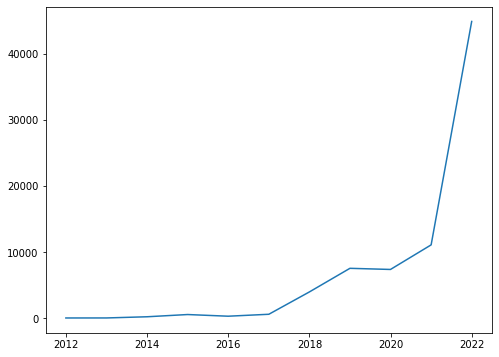

In [275]:
#yearly
import seaborn as sns
plt.figure(figsize=(8,6))
# sns.lineplot(x=df.index, y=df['Daily minimum temperatures'].fillna(np.inf),  linestyle="-")
plt.plot(data_y.index, data_y["Weighted_Price"], linestyle="-")
plt.xlabel=('Dates')
plt.ylabel=('Price')
plt.show();

# ARIMA

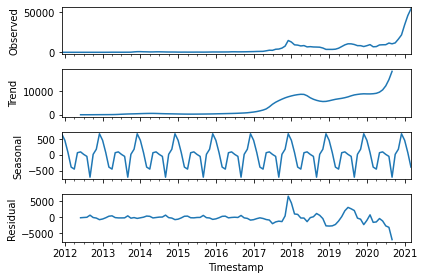

In [276]:
a = seasonal_decompose(data_m["Weighted_Price"])
a.plot();

In [277]:
from scipy import stats
import statsmodels.api as sm
import warnings
from itertools import product

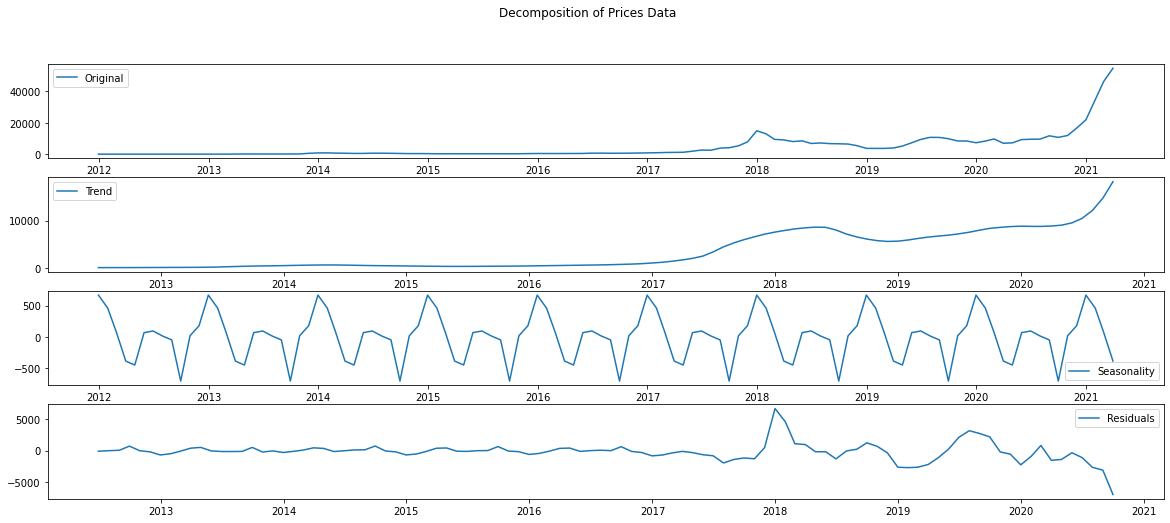

In [278]:
decomposition = sm.tsa.seasonal_decompose(data_m.Weighted_Price)

trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

fig = plt.figure(figsize=(20,8))

plt.subplot(411)
plt.plot(data_m.Weighted_Price, label='Original')
plt.legend(loc='best')
plt.subplot(412)
plt.plot(trend, label='Trend')
plt.legend(loc='best')
plt.subplot(413)
plt.plot(seasonal,label='Seasonality')
plt.legend(loc='best')
plt.subplot(414)
plt.plot(residual, label='Residuals')
plt.legend(loc='best')

fig.suptitle('Decomposition of Prices Data')
plt.show()

In [279]:
print("Dickey–Fuller test: p=%f" % sm.tsa.stattools.adfuller(data_m.Weighted_Price)[1])

Dickey–Fuller test: p=0.998837


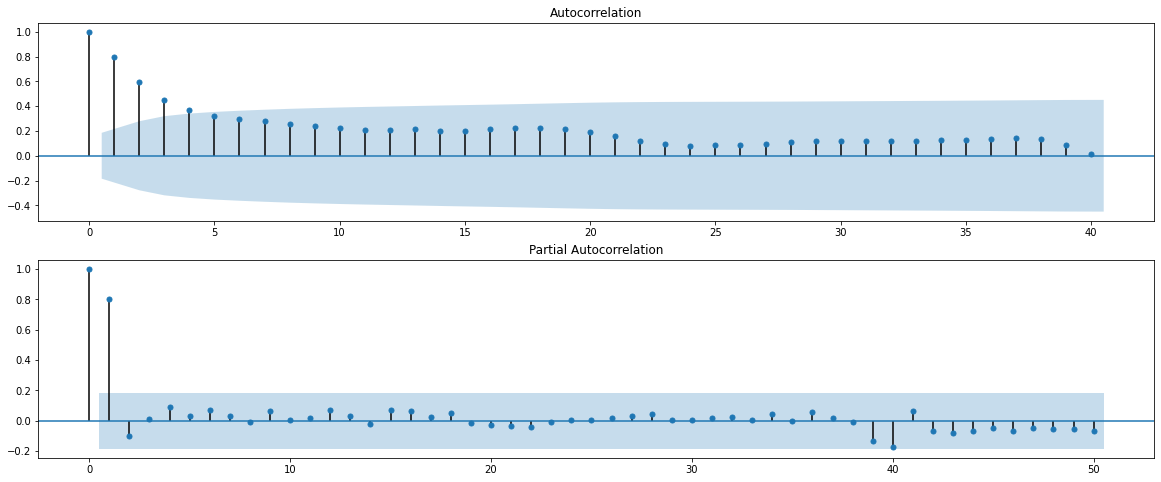

In [280]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot
pyplot.figure(figsize=(20,8))
pyplot.subplot(211)
plot_acf(data_m.Weighted_Price, ax=pyplot.gca(),lags=40)
pyplot.subplot(212)
plot_pacf(data_m.Weighted_Price, ax=pyplot.gca(), lags=50)
pyplot.show()

In [281]:
Qs = range(0, 2)
qs = range(0, 3)
Ps = range(0, 3)
ps = range(0, 3)
D=1
d=1
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

# Model Selection
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model=sm.tsa.statespace.SARIMAX(data_m.Weighted_Price, order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], 12),enforce_stationarity=False,
                                            enforce_invertibility=False).fit(disp=-1)
    except ValueError:
        #print('wrong parameters:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

In [282]:
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())
print(best_model.summary())

      parameters          aic
41  (2, 0, 2, 1)  1326.522882
53  (2, 2, 2, 1)  1326.807611
47  (2, 1, 2, 1)  1328.147893
52  (2, 2, 2, 0)  1329.720366
40  (2, 0, 2, 0)  1331.996705
                                 Statespace Model Results                                 
Dep. Variable:                     Weighted_Price   No. Observations:                  112
Model:             SARIMAX(2, 1, 0)x(2, 1, 1, 12)   Log Likelihood                -657.261
Date:                            Fri, 14 May 2021   AIC                           1326.523
Time:                                    16:44:40   BIC                           1340.266
Sample:                                12-31-2011   HQIC                          1332.000
                                     - 03-31-2021                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------

Dickey–Fuller test:: p=0.000000


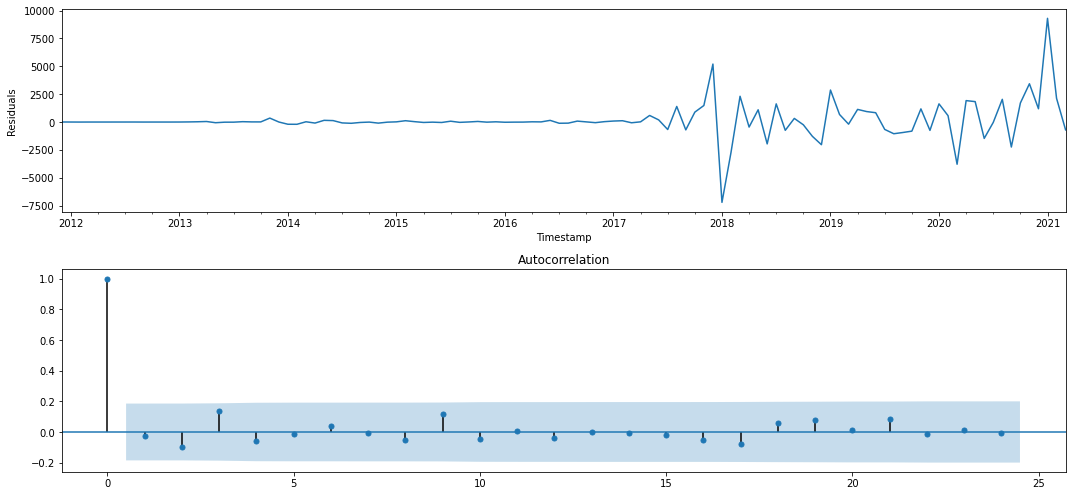

In [285]:
plt.figure(figsize=(15,7))
plt.subplot(211)
best_model.resid.plot()
plt.ylabel(u'Residuals')
ax = plt.subplot(212)
sm.graphics.tsa.plot_acf(best_model.resid.values.squeeze(), lags=24, ax=ax)

print("Dickey–Fuller test:: p=%f" % sm.tsa.stattools.adfuller(best_model.resid[13:])[1])

plt.tight_layout()
plt.show()

# Predicting for future months

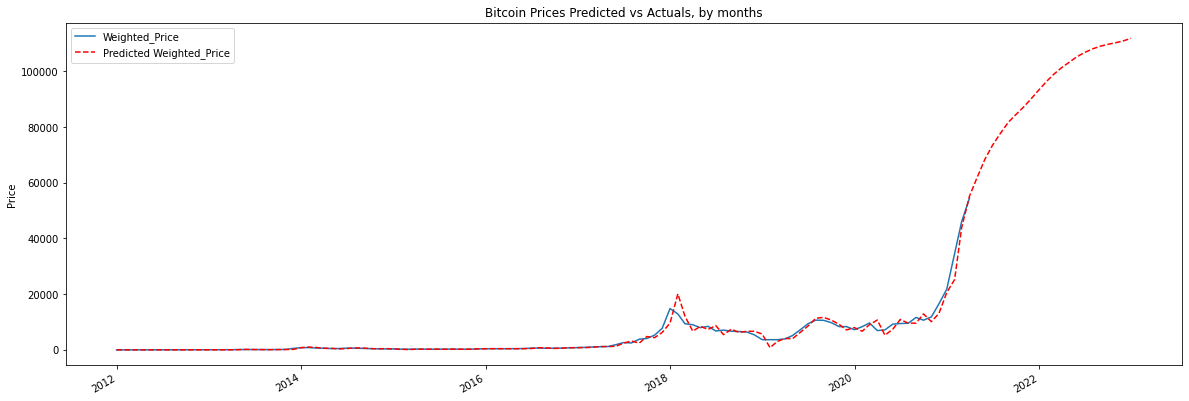

In [286]:

df_month2 = data_m[['Weighted_Price']]
date_list = [datetime(2021, 5, 31), datetime(2021, 6, 30), datetime(2021, 7, 31), datetime(2021, 8, 31), 
             datetime(2021, 9, 30), datetime(2021, 10, 31), datetime(2021, 11, 30), datetime(2021, 12, 31),
             datetime(2022, 1, 31),datetime(2022, 2, 28), datetime(2022, 3, 31), datetime(2021, 4, 30),datetime(2022, 5, 31), datetime(2022, 6, 30), datetime(2022, 7, 31), datetime(2022, 8, 31), 
             datetime(2022, 9, 30), datetime(2022, 10, 31), datetime(2022, 11, 30), datetime(2022, 12, 31)]
future = pd.DataFrame(index=date_list, columns= df_month2.columns)

df_month2 = pd.concat([df_month2, future])
df_month2['forecast'] = best_model.predict(start=0, end=300)
plt.figure(figsize=(20,7))
df_month2.Weighted_Price.plot()
df_month2.forecast.plot(color='r', ls='--', label='Predicted Weighted_Price')
plt.legend()
plt.title('Bitcoin Prices Predicted vs Actuals, by months')
plt.ylabel('Price')
plt.show()

In [284]:
import matplotlib.pyplot as plt
from importlib import reload
plt=reload(plt)

# Splitting to Train-Test data

In [406]:
train_data = data_m[:len(data_m)-8]
test_data = data_m[len(data_m)-88:]

In [407]:
train_data

,Weighted_Price
Timestamp,
2011-12-31 07:00:00,4.390000
2011-12-31 08:00:00,4.390000
2011-12-31 09:00:00,4.390000
2011-12-31 10:00:00,4.390000
2011-12-31 11:00:00,4.390000
...,...
2021-03-30 08:00:00,57965.579590
2021-03-30 09:00:00,58308.291657
2021-03-30 10:00:00,59014.299672


In [342]:
Qs = range(0, 2)
qs = range(0, 3)
Ps = range(0, 3)
ps = range(0, 3)
D=1
d=1
parameters = product(ps, qs, Ps, Qs)
parameters_list = list(parameters)
len(parameters_list)

# Model Selection
results = []
best_aic = float("inf")
warnings.filterwarnings('ignore')
for param in parameters_list:
    try:
        model=sm.tsa.statespace.SARIMAX(train_data.Weighted_Price, order=(param[0], d, param[1]), 
                                        seasonal_order=(param[2], D, param[3], 12),enforce_stationarity=False,
                                            enforce_invertibility=False).fit(disp=-1)
    except ValueError:
        #print('wrong parameters:', param)
        continue
    aic = model.aic
    if aic < best_aic:
        best_model = model
        best_aic = aic
        best_param = param
    results.append([param, model.aic])

In [343]:
result_table = pd.DataFrame(results)
result_table.columns = ['parameters', 'aic']
print(result_table.sort_values(by = 'aic', ascending=True).head())
print(best_model.summary())

      parameters          aic
40  (2, 0, 2, 0)  1052.916986
41  (2, 0, 2, 1)  1054.365771
46  (2, 1, 2, 0)  1054.736881
47  (2, 1, 2, 1)  1056.075069
52  (2, 2, 2, 0)  1056.367207
                                 Statespace Model Results                                 
Dep. Variable:                     Weighted_Price   No. Observations:                  100
Model:             SARIMAX(2, 1, 0)x(2, 1, 0, 12)   Log Likelihood                -521.458
Date:                            Fri, 14 May 2021   AIC                           1052.917
Time:                                    16:58:05   BIC                           1063.471
Sample:                                12-31-2011   HQIC                          1057.053
                                     - 03-31-2020                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
-------------

In [344]:
arima_pred = best_model.predict(start = len(train_data), end = len(data_m)-1, typ="levels").rename("ARIMA Predictions")
arima_pred

2020-04-30     6116.373796
2020-05-31     6697.373561
2020-06-30     7989.216775
2020-07-31     7423.902378
2020-08-31     9558.067508
2020-09-30    10166.239374
2020-10-31    12395.067695
2020-11-30    16461.161468
2020-12-31    28024.258368
2021-01-31    24790.956936
2021-02-28    19121.394292
2021-03-31    19159.369346
Freq: M, Name: ARIMA Predictions, dtype: float64

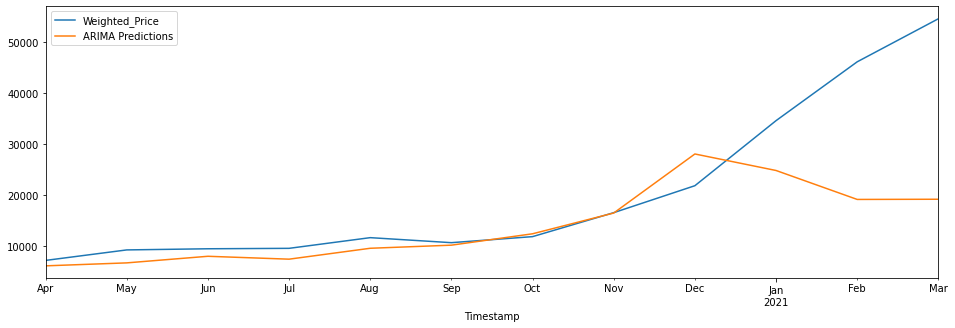

In [345]:
test_data['Weighted_Price'].plot(figsize = (16,5), legend=True)
arima_pred.plot(legend = True);

In [84]:
test_data['ARIMA_Predictions'] = arima_pred

LSTM

In [415]:
length= len(data)
length


,Weighted_Price
Timestamp,
2011-12-31,4.476259
2012-01-01,4.690833
2012-01-02,5.000000
2012-01-03,5.146146
2012-01-04,5.198247
...,...
2021-03-27,55192.101364
2021-03-28,55833.833794
2021-03-29,56910.440423


In [416]:
#daily
train_data_d=data[:int(0.95*length)]
test_data_d=data[int(0.95*length):]

In [417]:
train_data_d.tail(50)

,Weighted_Price
Timestamp,
2020-10-11 01:00:00,11330.405134
2020-10-11 02:00:00,11358.656272
2020-10-11 03:00:00,11336.009986
2020-10-11 04:00:00,11323.884501
2020-10-11 05:00:00,11327.693781
2020-10-11 06:00:00,11352.340292
2020-10-11 07:00:00,11359.738636
2020-10-11 08:00:00,11352.900548
2020-10-11 09:00:00,11346.306542


In [418]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [419]:
scaler.fit(train_data_d)
scaled_train_data_d = scaler.transform(train_data_d)
scaled_test_data_d = scaler.transform(test_data_d)

In [425]:
from keras.preprocessing.sequence import TimeseriesGenerator

n_input = 6
n_features= 1
generator = TimeseriesGenerator(scaled_train_data_d, scaled_train_data_d, length=n_input, batch_size=64)

In [426]:
def LSTM_model():
    
    model = Sequential()    
    model.add(LSTM(units = 50, return_sequences = True, input_shape = (n_input,1)))
    model.add(Dropout(0.2))
    model.add(LSTM(units = 50, return_sequences = True))
    model.add(Dropout(0.2))
    model.add(LSTM(units = 50))
    model.add(Dropout(0.2))
    model.add(Dense(units=1))
    
    return model

In [427]:
model = LSTM_model()
model.summary()
model.compile(optimizer='adam', loss='mean_squared_error')

Model: "sequential_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_34 (LSTM)               (None, 6, 50)             10400     
_________________________________________________________________
dropout_33 (Dropout)         (None, 6, 50)             0         
_________________________________________________________________
lstm_35 (LSTM)               (None, 6, 50)             20200     
_________________________________________________________________
dropout_34 (Dropout)         (None, 6, 50)             0         
_________________________________________________________________
lstm_36 (LSTM)               (None, 50)                20200     
_________________________________________________________________
dropout_35 (Dropout)         (None, 50)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)               

In [389]:
checkpointer = ModelCheckpoint(filepath = 'weights_best.hdf5', verbose = 1, save_best_only = True)


In [428]:
model.fit_generator(generator, epochs=10)

Epoch 1/10
1204/1204 [==============================] - 22s 15ms/step - loss: 0.0044
Epoch 2/10
1204/1204 [==============================] - 18s 15ms/step - loss: 9.3774e-04
Epoch 3/10
1204/1204 [==============================] - 18s 15ms/step - loss: 8.0692e-04
Epoch 4/10
1204/1204 [==============================] - 18s 15ms/step - loss: 5.4285e-04
Epoch 5/10
1204/1204 [==============================] - 18s 15ms/step - loss: 5.6445e-04
Epoch 6/10
1204/1204 [==============================] - 18s 15ms/step - loss: 4.7712e-04
Epoch 7/10
1204/1204 [==============================] - 18s 15ms/step - loss: 8.2090e-04
Epoch 8/10
1204/1204 [==============================] - 17s 14ms/step - loss: 4.7176e-04
Epoch 9/10
1204/1204 [==============================] - 17s 14ms/step - loss: 5.4371e-04
Epoch 10/10
1204/1204 [==============================] - 17s 14ms/step - loss: 4.8840e-04


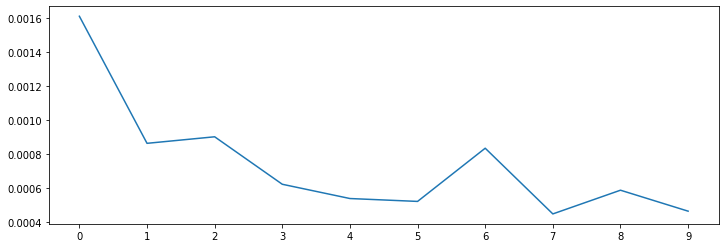

In [429]:
losses_lstm = model.history.history['loss']
plt.figure(figsize=(12,4))
plt.xticks(np.arange(0,21,1))
plt.plot(range(len(losses_lstm)),losses_lstm);

In [430]:
lstm_predictions_scaled = list()

batch = scaled_train_data_d[-n_input:]
current_batch = batch.reshape((1, n_input, n_features))

for i in range(len(test_data_d)):   
    lstm_pred = model.predict(current_batch)[0]
    lstm_predictions_scaled.append(lstm_pred) 
    current_batch = np.append(current_batch[:,1:,:],[[lstm_pred]],axis=1)

In [431]:

batch = scaled_train_data_d[-n_input:]
current_batch = batch.reshape((1, n_input, 1))

In [432]:
lstm_predictions = scaler.inverse_transform(lstm_predictions_scaled)

In [433]:
test_data_d['LSTM_Predictions'] = lstm_predictions

In [434]:
test_data_d

,Weighted_Price,LSTM_Predictions
Timestamp,,
2020-10-13 03:00:00,11466.171194,10073.123869
2020-10-13 04:00:00,11473.959342,9939.736757
2020-10-13 05:00:00,11505.297728,9678.881482
2020-10-13 06:00:00,11486.895885,9337.998254
2020-10-13 07:00:00,11460.409157,8968.071773
...,...,...
2021-03-30 20:00:00,58682.385127,2266.888623
2021-03-30 21:00:00,58705.094588,2266.888623
2021-03-30 22:00:00,58788.454429,2266.888623


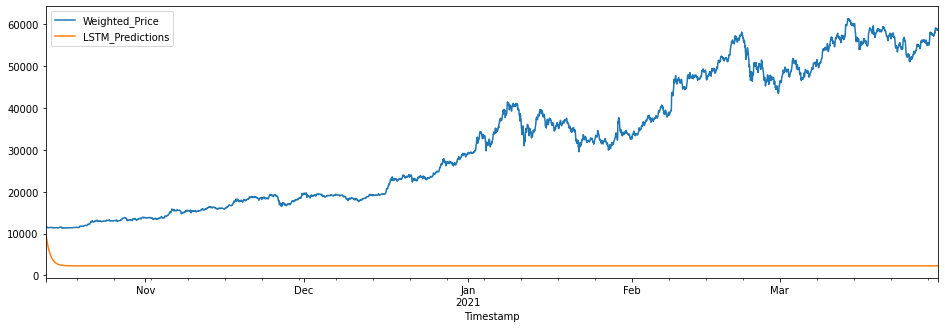

In [435]:
test_data_d['Weighted_Price'].plot(figsize = (16,5), legend=True)
test_data_d['LSTM_Predictions'].plot(legend = True);

In [436]:
df= pd.read_csv("/content/drive/MyDrive/bitstampUSD_1-min_data_2012-01-01_to_2021-03-31.csv")

In [437]:
df["date"]=pd.to_datetime(df["Timestamp"],unit="s").dt.date
group=df.groupby("date")
df=group["Close"].mean()
df.isnull().sum()

0

In [438]:
close_train=df.iloc[:len(df)-50]
close_test=df.iloc[len(close_train):]

In [439]:
close_train=np.array(close_train)
close_train=close_train.reshape(close_train.shape[0],1)

from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler(feature_range=(0,1))
close_scaled=scaler.fit_transform(close_train)

In [440]:
timestep=50
x_train=[]
y_train=[]

for i in range(timestep,close_scaled.shape[0]):
    x_train.append(close_scaled[i-timestep:i,0])
    y_train.append(close_scaled[i,0])

x_train,y_train=np.array(x_train),np.array(y_train)
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1],1) #reshaped for RNN
print("x_train shape= ",x_train.shape)
print("y_train shape= ",y_train.shape)

x_train shape=  (3276, 50, 1)
y_train shape=  (3276,)
